# Predicting Tropical Cyclone Severity: A CV-Based Approach
#### Using satellite imagery to predict maximum sustained wind speeds of tropical cyclones
#### Data Exploration

In this notebook, we explore the images and metadata associated to the NASA Tropical Storm Competition hosted by DrivenData in Fall 2020. Further information about the competition, along with all data used here, is available [here](https://www.drivendata.org/competitions/72/predict-wind-speeds/). We draw inspiration from [this notebook](https://github.com/radiantearth/mlhub-tutorials/blob/main/notebooks/NASA%20Tropical%20Storm%20Wind%20Speed%20Challenge/nasa-tropical-storm-wind-speed-challenge-benchmark.ipynb).


Andrew McDonald // CSE 881 // April 2021

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from pathlib import Path
from matplotlib.cm import viridis

# relevant directories
PATH = {
    "metadata": Path.cwd() / "nasa_tropical_storm_competition_csvs",
    "train": Path.cwd() / "nasa_tropical_storm_competition_train_source",
    "test": Path.cwd() / "nasa_tropical_storm_competition_test_source",
    "img": Path.cwd() / "report" / "img"
}

#### Explore Data

In [2]:
features = pd.read_csv(PATH["metadata"] / "training_set_features.csv")
labels = pd.read_csv(PATH["metadata"] / "training_set_labels.csv")
data = pd.merge(features, labels, on="Image ID")
data.columns = [s.replace(" ", "_").lower() for s in data.columns]
data

,image_id,storm_id,relative_time,ocean,wind_speed
0,nhe_000,nhe,0,2,34
1,nhe_001,nhe,1800,2,34
2,nhe_002,nhe,3600,2,34
3,nhe_003,nhe,5402,2,33
4,nhe_004,nhe,9001,2,32
...,...,...,...,...,...
70252,yti_071,yti,255601,1,45
70253,yti_072,yti,259201,1,45
70254,yti_073,yti,262801,1,45
70255,yti_074,yti,266401,1,45


In [3]:
data.describe()

,relative_time,ocean,wind_speed
count,7.025700e+04,70257.000000,70257.000000
mean,3.082266e+05,1.326046,50.344008
std,2.641590e+05,0.468768,26.795277
min,0.000000e+00,1.000000,15.000000
25%,1.008010e+05,1.000000,30.000000
50%,2.429980e+05,1.000000,43.000000
75%,4.500000e+05,2.000000,62.000000
max,1.839605e+06,2.000000,185.000000


In [4]:
print(f"Number of unique storms: {data['storm_id'].nunique()}")

Number of unique storms: 494


In [5]:
ocean_counts = data.groupby("ocean")["storm_id"].nunique()
print(f"Number of unique storms per ocean: {ocean_counts}")

Number of unique storms per ocean: ocean
1    264
2    230
Name: storm_id, dtype: int64


In [6]:
storm_counts = data.groupby("storm_id").size()
storm_counts.describe()

count    494.000000
mean     142.220648
std      123.151772
min        4.000000
25%       46.250000
50%      101.500000
75%      209.000000
max      648.000000
dtype: float64

In [7]:
data["wind_speed"].describe()

count    70257.000000
mean        50.344008
std         26.795277
min         15.000000
25%         30.000000
50%         43.000000
75%         62.000000
max        185.000000
Name: wind_speed, dtype: float64

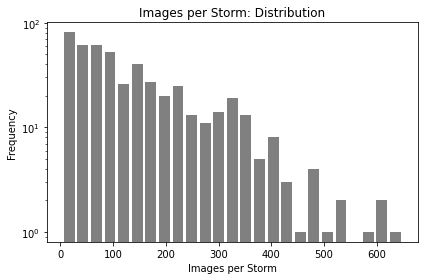

In [8]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(storm_counts, bins=25, log=True, rwidth=0.8, color="grey")
ax.set_title("Images per Storm: Distribution")
ax.set_xlabel("Images per Storm")
ax.set_ylabel("Frequency")
fig.tight_layout()
fig.savefig(PATH["img"] / "img_hist.png")
plt.show()

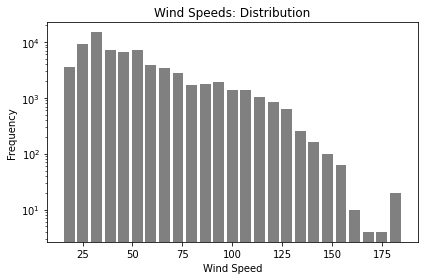

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(data["wind_speed"], bins=25, log=True, rwidth=0.8, color="grey")
ax.set_title("Wind Speeds: Distribution")
ax.set_xlabel("Wind Speed")
ax.set_ylabel("Frequency")
fig.tight_layout()
fig.savefig(PATH["img"] / "wind_hist.png")
plt.show()

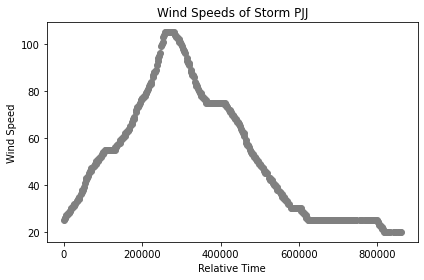

In [10]:
def wind_speed_time(storm_id):
    fig, ax = plt.subplots(figsize=(6, 4))
    storm = data[data["storm_id"] == storm_id]
    ax.scatter(storm["relative_time"], storm["wind_speed"], color="grey")
    ax.set_title(f"Wind Speeds of Storm {storm_id.upper()}")
    ax.set_xlabel("Relative Time")
    ax.set_ylabel("Wind Speed")
    fig.tight_layout()
    plt.show()

for storm_id in data["storm_id"].sample(1, random_state=881):
    wind_speed_time(storm_id)

In [11]:
data["image_path"] = "nasa_tropical_storm_competition_train_source_" + data["image_id"]
data["filename"] = PATH["train"] / data["image_path"] / "image.jpg"
data

,image_id,storm_id,relative_time,ocean,wind_speed,image_path,filename
0,nhe_000,nhe,0,2,34,nasa_tropical_storm_competition_train_source_n...,D:\Documents\MSU\SS21\CSE 881\Project\nasa_tro...
1,nhe_001,nhe,1800,2,34,nasa_tropical_storm_competition_train_source_n...,D:\Documents\MSU\SS21\CSE 881\Project\nasa_tro...
2,nhe_002,nhe,3600,2,34,nasa_tropical_storm_competition_train_source_n...,D:\Documents\MSU\SS21\CSE 881\Project\nasa_tro...
3,nhe_003,nhe,5402,2,33,nasa_tropical_storm_competition_train_source_n...,D:\Documents\MSU\SS21\CSE 881\Project\nasa_tro...
4,nhe_004,nhe,9001,2,32,nasa_tropical_storm_competition_train_source_n...,D:\Documents\MSU\SS21\CSE 881\Project\nasa_tro...
...,...,...,...,...,...,...,...
70252,yti_071,yti,255601,1,45,nasa_tropical_storm_competition_train_source_y...,D:\Documents\MSU\SS21\CSE 881\Project\nasa_tro...
70253,yti_072,yti,259201,1,45,nasa_tropical_storm_competition_train_source_y...,D:\Documents\MSU\SS21\CSE 881\Project\nasa_tro...
70254,yti_073,yti,262801,1,45,nasa_tropical_storm_competition_train_source_y...,D:\Documents\MSU\SS21\CSE 881\Project\nasa_tro...
70255,yti_074,yti,266401,1,45,nasa_tropical_storm_competition_train_source_y...,D:\Documents\MSU\SS21\CSE 881\Project\nasa_tro...


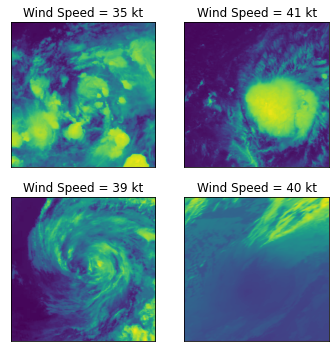

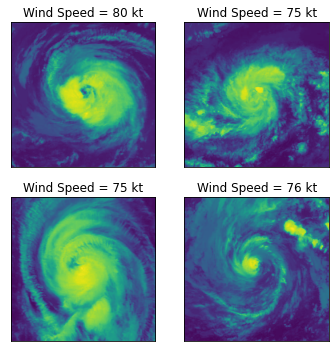

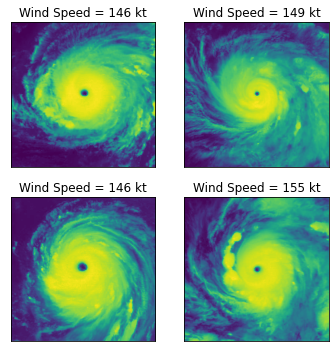

In [12]:
def wind_speed_img(wind_speed):
    fig, ax = plt.subplots(2, 2, figsize=(5, 5))
    ax = ax.ravel()
    sample_imgs = data[(data["wind_speed"] <= wind_speed + 5) &
                       (data["wind_speed"] >= wind_speed - 5)].sample(
                        n=4, replace=False, random_state=881)
    for i in range(4):
        sample_img = sample_imgs.iloc[i]
        img = Image.open(str(sample_img["filename"])).convert("L")
        ax[i].imshow(img)
        ax[i].axes.get_xaxis().set_ticks([])
        ax[i].axes.get_yaxis().set_ticks([])
        ax[i].set_title(f"Wind Speed = {sample_img['wind_speed']} kt")

    fig.tight_layout()
    fig.savefig(PATH["img"] / f"wind_img_{wind_speed}.png")


wind_speed_img(40)
wind_speed_img(80)
wind_speed_img(150)

In [13]:
# find a storm with few images to visualize
storm_counts[storm_counts == 10]


storm_id
alc    10
aox    10
bmj    10
caa    10
dfh    10
foj    10
hdi    10
hqu    10
njq    10
rzk    10
smj    10
wgl    10
dtype: int64

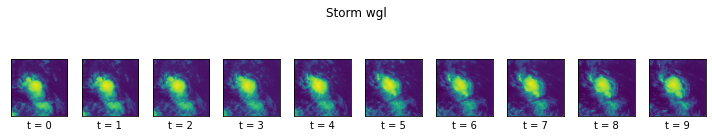

In [14]:
def view_storm(storm_id):
    storm = data[data["storm_id"] == storm_id]
    n_images = len(storm)
    fig, ax = plt.subplots((n_images - 1) // 10 + 1, 10, figsize=(10, 2))
    ax = ax.flatten()
    for i, filename in enumerate(storm["filename"]):
        img = Image.open(str(filename))
        ax[i].imshow(img)
        ax[i].axes.get_xaxis().set_ticks([])
        ax[i].axes.get_yaxis().set_ticks([])
        ax[i].set_xlabel(f"t = {i}")
    fig.suptitle(f"Storm {storm_id}")
    fig.tight_layout()
    plt.show()

view_storm("wgl")

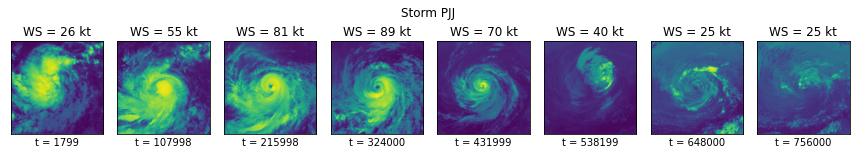

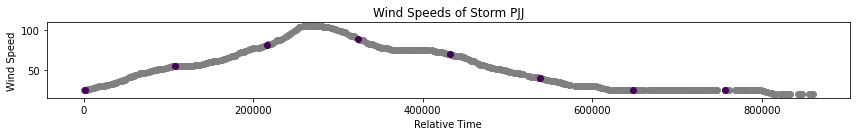

In [15]:
def view_storm_timeline(storm_id, n_images):
    # determine frames to plot
    storm_imgs = data[data["storm_id"] == storm_id]
    max_time = storm_imgs["relative_time"].max()
    relative_times = [(i * max_time) // n_images for i in range(n_images)]

    # plot sequence of images of lifecycle of storm
    fig, ax = plt.subplots(1, n_images, figsize=(12, 2))
    plotted_points = []    # store (time, speed) pairs of plotted images to highlight
    for i in range(n_images):
        t = relative_times[i]
        storm = storm_imgs[storm_imgs["relative_time"] > t].iloc[0]
        relative_time = storm["relative_time"]
        filename, wind_speed = storm["filename"], storm["wind_speed"]
        plotted_points.append((relative_time, wind_speed))
        img = Image.open(str(filename))
        ax[i].imshow(img)
        ax[i].axes.get_xaxis().set_ticks([])
        ax[i].axes.get_yaxis().set_ticks([])
        ax[i].set_title(f"WS = {wind_speed} kt")
        ax[i].set_xlabel(f"t = {relative_time}")
    fig.suptitle(f"Storm {storm_id.upper()}")
    fig.tight_layout()
    fig.savefig(PATH["img"] / f"storm_timeline_{storm_id}_img.png")
    plt.show()

    # plot timeline
    fig, ax = plt.subplots(figsize=(12, 2))
    plotted_points = np.array(plotted_points)
    ax.scatter(storm_imgs["relative_time"], storm_imgs["wind_speed"], color="grey")
    ax.scatter(plotted_points[:, 0], plotted_points[:, 1], color=viridis(0.0))
    ax.set_title(f"Wind Speeds of Storm {storm_id.upper()}")
    ax.set_xlabel("Relative Time")
    ax.set_ylabel("Wind Speed")
    fig.tight_layout()
    fig.savefig(PATH["img"] / f"storm_timeline_{storm_id}_tl.png")
    plt.show()

view_storm_timeline("pjj", 8)
